#<center> AMAZON REVIEWS - EXPLORATORY DATA ANALYSIS & PREPROCESSING

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import gzip
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from collections import defaultdict
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Data Aquisition

In [ ]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')


# House And Kitchen Dataset

In [ ]:
meta_hk = getDF('/content/drive/MyDrive/files/meta_Home_and_Kitchen.json.gz')
meta_hk.head()

asin                        salesRank  \
0  0076144011               {'Books': 6285595}   
1  0130350591     {'Kitchen & Dining': 459680}   
2  0307394530  {'Arts, Crafts & Sewing': 3597}   
3  0439903491               {'Software': 7065}   
4  0578060604                              NaN   

                                               imUrl  \
0  http://g-ecx.images-amazon.com/images/G/01/x-s...   
1  http://ecx.images-amazon.com/images/I/21zcx6RC...   
2  http://ecx.images-amazon.com/images/I/51A4FWuj...   
3  http://ecx.images-amazon.com/images/I/61tVxcko...   
4  http://ecx.images-amazon.com/images/I/41aCELWJ...   

                                          categories  \
0                                 [[Home & Kitchen]]   
1  [[Home & Kitchen, Kitchen & Dining, Dining & E...   
2      [[Home & Kitchen, Artwork, Posters & Prints]]   
3      [[Home & Kitchen, Artwork, Posters & Prints]]   
4  [[Home & Kitchen, Furniture, Kitchen & Dining ...   

                                               title  \
0                      Ninjas, Piranhas, and Galileo   
1      Le Creuset Kiwi (Green) Butter Dish Stoneware   
2                     Martha Stewart's Wedding Cakes   
3                                                NaN   
4  Build A Maloof Inspired Low Back Dining Chair ...   

                                         description  \
0                                                NaN   
1  Each piece of Le Creuset dinnerware is crafted...   
2  Of all the decisions that go into planning a w...   
3  Shiver me timbers! Solve I SPY pirate picture ...   
4  The Maloofinspired Low Back Dining Chair is no...   

                                             related  price         brand  
0                                                NaN    NaN           NaN  
1                                                NaN    NaN           NaN  
2  {'also_bought': ['144630163X', '1402717733', '...  14.99  Random House  
3  {'also_viewed': ['B000YFSZU8', 'B0016KWZB0', '...  29.99           NaN  
4                    {'also_viewed': ['B004IO6RS8']}    NaN           NaN

In [ ]:
review_hk = getDF('/content/drive/MyDrive/files/reviews_Home_and_Kitchen.json.gz')
review_hk.head()

reviewerID        asin       reviewerName   helpful  \
0  A210NOCSTBT4OD  0076144011             Sheila    [0, 0]   
1  A28ILV4TOG8BH2  0130350591           ccjensen    [0, 0]   
2  A31B4D7URW4DNZ  0307394530             3Gigi3  [11, 16]   
3  A2HU0RPDRZZOP1  0307394530     Alexey Leontev    [0, 0]   
4   A7J0XOW7DYBBD  0307394530  Allan Mar Cariaso    [0, 0]   

                                          reviewText  overall  \
0  Have you ever thought about how you met your b...      4.0   
1  The butter dish is serving us well, and keepin...      5.0   
2  I anxiously waited for the book I had pre orde...      2.0   
3  Fantastic book, a lot of good, original recipe...      5.0   
4  Can't wait to try all the amazing techniques. ...      5.0   

                                    summary  unixReviewTime   reviewTime  
0                                    Lovely      1349308800   10 4, 2012  
1  Nice looking, and keeps the butter fresh      1300752000  03 22, 2011  
2                       Mother of the Bride      1214784000  06 30, 2008  
3                              amazing book      1277337600  06 24, 2010  
4                              Very helpful      1393113600  02 23, 2014

In [ ]:
# Creating subcategory column
subcategory = []
for i in meta_hk['categories']:
  if len(i[0]) == 1:
    subcategory.append(i[0][-1])
  else:
    subcategory.append(i[0][1])

subcategory = pd.DataFrame(subcategory)
subcategory

meta_hk['subcategory'] = subcategory
meta_hk

asin                        salesRank  \
0       0076144011               {'Books': 6285595}   
1       0130350591     {'Kitchen & Dining': 459680}   
2       0307394530  {'Arts, Crafts & Sewing': 3597}   
3       0439903491               {'Software': 7065}   
4       0578060604                              NaN   
...            ...                              ...   
436983  B00LVJQDBY                              NaN   
436984  B00LXFN8MS   {'Home &amp; Kitchen': 515079}   
436985  B00LUVXMX0                              NaN   
436986  B00M0U03EQ                              NaN   
436987  B00LXFP8NK                              NaN   

                                                    imUrl  \
0       http://g-ecx.images-amazon.com/images/G/01/x-s...   
1       http://ecx.images-amazon.com/images/I/21zcx6RC...   
2       http://ecx.images-amazon.com/images/I/51A4FWuj...   
3       http://ecx.images-amazon.com/images/I/61tVxcko...   
4       http://ecx.images-amazon.com/images/I/41aCELWJ...   
...                                                   ...   
436983  http://ecx.images-amazon.com/images/I/51x%2Btj...   
436984  http://ecx.images-amazon.com/images/I/61e35I1u...   
436985  http://ecx.images-amazon.com/images/I/61FBUFmn...   
436986  http://ecx.images-amazon.com/images/I/41CDwpGU...   
436987  http://ecx.images-amazon.com/images/I/61JRQwjE...   

                                               categories  \
0                                      [[Home & Kitchen]]   
1       [[Home & Kitchen, Kitchen & Dining, Dining & E...   
2           [[Home & Kitchen, Artwork, Posters & Prints]]   
3           [[Home & Kitchen, Artwork, Posters & Prints]]   
4       [[Home & Kitchen, Furniture, Kitchen & Dining ...   
...                                                   ...   
436983  [[Home & Kitchen, Furniture, Living Room Furni...   
436984                        [[Home & Kitchen, Bedding]]   
436985                [[Home & Kitchen, Bedding, Quilts]]   
436986  [[Home & Kitchen, Furniture, Home Office Furni...   
436987                        [[Home & Kitchen, Bedding]]   

                                                    title  \
0                           Ninjas, Piranhas, and Galileo   
1           Le Creuset Kiwi (Green) Butter Dish Stoneware   
2                          Martha Stewart's Wedding Cakes   
3                                                     NaN   
4       Build A Maloof Inspired Low Back Dining Chair ...   
...                                                   ...   
436983  Big Boy Recliner Chair, Brown, Hold up to 250 ...   
436984  6 pc Kids Bedding Monkey Twin Comforter set wi...   
436985  3 Pc Cotton Filled Blue White Scroll Floral Qu...   
436986  Student Dorm Home Office Laptop Computer Moder...   
436987  6 pc Kids Bedding Butterfly Twin Comforter set...   

                                              description  \
0                                                     NaN   
1       Each piece of Le Creuset dinnerware is crafted...   
2       Of all the decisions that go into planning a w...   
3       Shiver me timbers! Solve I SPY pirate picture ...   
4       The Maloofinspired Low Back Dining Chair is no...   
...                                                   ...   
436983  The Northwest Territory Big Boy Recliner Chair...   
436984  Alyssa HomeTM Kids twin comforter set Monkey T...   
436985  Bedspread offers superior softness and warmth ...   
436986  This student desk is perfect for any home offi...   
436987  Alyssa HomeTM Kids twin comforter set Butterfl...   

                                                  related  price  \
0                                                     NaN    NaN   
1                                                     NaN    NaN   
2       {'also_bought': ['144630163X', '1402717733', '...  14.99   
3       {'also_viewed': ['B000YFSZU8', 'B0016KWZB0', '...  29.99   
4                         {'also_viewed': ['B004IO6RS8']}    NaN   
...          

# Musical Instruments Dataset


In [ ]:
meta_music = getDF('/content/drive/MyDrive/files/meta_Musical_Instruments.json.gz')
meta_music.head()

asin                                              title  price  \
0  0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...  17.95   
1  0014072149  Double Concerto in D Minor By Johann Sebastian...  18.77   
2  0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...    NaN   
3  0041913574  Aida: Opera in Quattro Atti, Partitura -- Aida...  49.99   
4  0201891859                                          Nocturnes    NaN   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/41EpRmh8...   
1  http://ecx.images-amazon.com/images/I/41m6ygCq...   
2  http://ecx.images-amazon.com/images/I/41maAqSO...   
3  http://ecx.images-amazon.com/images/I/513kRMv%...   
4  http://ecx.images-amazon.com/images/I/41SXCAzs...   

                         salesRank  \
0  {'Musical Instruments': 207315}   
1   {'Musical Instruments': 94593}   
2  {'Musical Instruments': 222972}   
3                              NaN   
4  {'Musical Instruments': 171871}   

                                          categories  \
0  [[Musical Instruments, Instrument Accessories,...   
1                            [[Musical Instruments]]   
2  [[Musical Instruments, Instrument Accessories,...   
3                            [[Musical Instruments]]   
4  [[Musical Instruments, Instrument Accessories,...   

                                             related brand  \
0                                                NaN   NaN   
1  {'also_viewed': ['B0058DK7RA'], 'buy_after_vie...         
2                                                NaN   NaN   
3                                                NaN   NaN   
4                                                NaN   NaN   

                                         description  
0                                                NaN  
1  Composer: J.S. Bach.Peters Edition.For two vio...  
2  Vivaldi's famous set of four violin concertos ...  
3  444 pages. \nReprint of corrected and revised ...  
4                                                NaN

In [ ]:
review_music = getDF("/content/drive/MyDrive/files/reviews_Musical_Instruments (1).json.gz")
review_music.head()

reviewerID        asin           reviewerName helpful  \
0  A1YS9MDZP93857  0006428320            John Taylor  [0, 0]   
1  A3TS466QBAWB9D  0014072149          Silver Pencil  [0, 0]   
2  A3BUDYITWUSIS7  0041291905  joyce gabriel cornett  [0, 0]   
3  A19K10Z0D2NTZK  0041913574            TexasCowboy  [0, 0]   
4  A14X336IB4JD89  0201891859                 dfjm53  [0, 1]   

                                          reviewText  overall  \
0  The portfolio is fine except for the fact that...      3.0   
1  If you are a serious violin student on a budge...      5.0   
2  This is and excellent edition and perfectly tr...      5.0   
3  Perfect for someone who is an opera fan or a w...      5.0   
4  How many Nocturnes does it contain? All of the...      1.0   

                            summary  unixReviewTime   reviewTime  
0                     Parts missing      1394496000  03 11, 2014  
1  Perform it with a friend, today!      1370476800   06 6, 2013  
2           Vivalldi's Four Seasons      1381708800  10 14, 2013  
3   Full score: voice and orchestra      1285200000  09 23, 2010  
4      Unable to determine contents      1350432000  10 17, 2012

In [ ]:
# Creating subcategory column

subcategory = []
for i in meta_music['categories']:
  if len(i[0]) == 1:
    subcategory.append(i[0][-1])
  else:
    subcategory.append(i[0][1])

subcategory = pd.DataFrame(subcategory)
subcategory

meta_music['subcategory'] = subcategory
meta_music

asin                                              title   price  \
0      0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...   17.95   
1      0014072149  Double Concerto in D Minor By Johann Sebastian...   18.77   
2      0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...     NaN   
3      0041913574  Aida: Opera in Quattro Atti, Partitura -- Aida...   49.99   
4      0201891859                                          Nocturnes     NaN   
...           ...                                                ...     ...   
84896  B00LEWRD80  Blue Microphones Yeti USB Microphone - Silver ...  239.99   
84897  B00LIR7QNS  Promotion Item - Alto Recorder Matte Black 3-P...     NaN   
84898  B00LJD5AUM                             Big Muddy Mandolin M-4     NaN   
84899  B00LK7A9SK                                 Yulong Guo Soloist     NaN   
84900  SMLRBIMX03  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  229.00   

                                                   imUrl  \
0      http://ecx.images-amazon.com/images/I/41EpRmh8...   
1      http://ecx.images-amazon.com/images/I/41m6ygCq...   
2      http://ecx.images-amazon.com/images/I/41maAqSO...   
3      http://ecx.images-amazon.com/images/I/513kRMv%...   
4      http://ecx.images-amazon.com/images/I/41SXCAzs...   
...                                                  ...   
84896  http://ecx.images-amazon.com/images/I/51MyiLgp...   
84897  http://ecx.images-amazon.com/images/I/31gmIJJQ...   
84898  http://ecx.images-amazon.com/images/I/31SyKqMN...   
84899  http://ecx.images-amazon.com/images/I/315UTGrQ...   
84900  http://ecx.images-amazon.com/images/I/31R3EGJN...   

                             salesRank  \
0      {'Musical Instruments': 207315}   
1       {'Musical Instruments': 94593}   
2      {'Musical Instruments': 222972}   
3                                  NaN   
4      {'Musical Instruments': 171871}   
...                                ...   
84896    {'Musical Instruments': 3973}   
84897   {'Musical Instruments': 32216}   
84898                              NaN   
84899                              NaN   
84900  {'Musical Instruments': 107527}   

                                              categories  \
0      [[Musical Instruments, Instrument Accessories,...   
1                                [[Musical Instruments]]   
2      [[Musical Instruments, Instrument Accessories,...   
3                                [[Musical Instruments]]   
4      [[Musical Instruments, Instrument Accessories,...   
...                                                  ...   
84896  [[Musical Instruments, Microphones & Accessori...   
84897  [[Musical Instruments, Band & Orchestra, Wind ...   
84898  [[Musical Instruments, Stringed Instruments, F...   
84899  [[Musical Instruments, Guitars, Classical & Ny...   
84900  [[Musical Instruments, Instrument Accessories,...   

                                                 related     brand  \
0                                                    NaN       NaN   
1      {'also_viewed': ['B0058DK7RA'], 'buy_after_vie...             
2                                                    NaN       NaN   
3                                                    NaN       NaN   
4                                                    NaN       NaN   
...                                                  ...       ...   
84896  {'also_viewed': ['B002VA464S', 'B005DVF15A', '...       NaN   
84897  {'also_viewed': ['B00LIR3SK8', 'B00502E892', '...       NaN   
84898                                                NaN       NaN   
84899                                                NaN       NaN   
84900  {'also_viewed': ['B003SRHFIW', 'B001E95KJC', '...  LR Baggs   

                                             description  \
0                                                    NaN   
1      Composer: J.S. Bach.Peters Edition.For two vio...   
2      Vivaldi's famous set of four violin concertos ...   
3      444 pages. \nRepr

# <center> Merging Metadata and Reviews

In [ ]:
hk_eda = pd.merge(meta_hk, review_hk, on="asin", how="inner")
hk_eda.head(5)

In [ ]:
music_eda = pd.merge(meta_music, review_music, on="asin", how="inner")
music_eda.head(5)

# <center> Deleting Irrelevant Columns

In [ ]:
hk_eda.drop(['salesRank', 'imUrl',"related",'reviewerName','unixReviewTime'], axis=1,inplace=True)
hk_eda.head(5)

In [ ]:
#renaming columns

hk_eda.rename(columns = {'reviewText': 'review',"overall" : "ratings"}, inplace=True)
hk_eda.rename(columns = {'reviewTime': 'date',"overall" : "ratings"}, inplace=True)

music_eda.rename(columns = {'reviewText': 'review',"overall" : "ratings"}, inplace=True)
music_eda.rename(columns = {'reviewTime': 'date',"overall" : "ratings"}, inplace=True)

# Dropping Null Values

In [ ]:
hk_eda.isnull().sum()

In [ ]:
hk_eda.dropna(inplace=True)

In [ ]:
hk_eda.isnull().sum()

In [ ]:
music_eda.isnull().sum()

asin                 0
title            44263
price            28147
categories           0
brand           198650
description      16247
subcategory          0
reviewerID           0
helpful              0
review               0
ratings              0
summary              0
date                 0
subjectivity         0
polarity             0
sentiment            0
dtype: int64

In [ ]:
music_eda.dropna(inplace=True)

In [ ]:
music_eda.isnull().sum()

asin            0
title           0
price           0
brand           0
description     0
subcategory     0
reviewerID      0
review          0
ratings         0
summary         0
date            0
subjectivity    0
polarity        0
sentiment       0
helpful_rate    0
dtype: int64

# Creating Helpful rate column

In [ ]:
def helpful_col(df):
  helpful_rate = []
  for x,y in df['helpful']:
    if x == 0 and y == 0:
      helpful_rate.append(float(0.000))
    else:
      helpful_rate.append(np.round((x/y),3))
  return helpful_rate

In [ ]:
hk_eda['helpful_rate'] = helpful_col(hk_eda)
hk_eda.drop('helpful', axis=1, inplace=True)

In [ ]:
hk_eda.sort_values(['helpful_rate'], ascending=False)

asin                                         categories  \
4253874  B00LMRE588  [[Home & Kitchen, Heating, Cooling & Air Quali...   
2227018  B002R59H1O  [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...   
776823   B000BC5GME  [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...   
2227013  B002R59H1O  [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...   
2227012  B002R59H1O  [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...   
...             ...                                                ...   
2179907  B002MUB942  [[Home & Kitchen, Bedding, Blankets & Throws, ...   
2179906  B002MUB942  [[Home & Kitchen, Bedding, Blankets & Throws, ...   
799926   B000BQL7FU  [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...   
2179904  B002MUB942  [[Home & Kitchen, Bedding, Blankets & Throws, ...   
1980377  B0023X32MA  [[Home & Kitchen, Kitchen & Dining, Kitchen Ut...   

                                                     title  \
4253874                    ArcticAire 70-pint Dehumidifier   
2227018                           Fox Run Tulz Onion Saver   
776823   Rubbermaid Commercial Products FG321800CLR 4-Q...   
2227013                           Fox Run Tulz Onion Saver   
2227012                           Fox Run Tulz Onion Saver   
...                                                    ...   
2179907  Soft Heat&reg; Luxury Micro-Fleece Electric He...   
2179906  Soft Heat&reg; Luxury Micro-Fleece Electric He...   
799926                   Arrow Plastic 00055 Ice Cube Tray   
2179904  Soft Heat&reg; Luxury Micro-Fleece Electric He...   
1980377  Four Piece NEW STYLE 2 1/4&quot; Herb, Spice o...   

                                               description   price  \
4253874  Improve the comfort and health of your home by...  310.48   
2227018  The Tulz onion keeper is perfect for keeping o...    8.55   
776823   Rubbermaid Commercial Products FG321800CLR 4-Q...   16.18   
2227013  The Tulz onion keeper is perfect for keeping o...    8.55   
2227012  The Tulz onion keeper is perfect for keeping o...    8.55   
...                                                    ...     ...   
2179907  Soft Heat&#xAE; Luxury Micro-Fleece Electric H...  121.95   
2179906  Soft Heat&#xAE; Luxury Micro-Fleece Electric H...  121.95   
799926   Makes 60 barrel shaped mini cubes. Ideal for c...    4.61   
2179904  Soft Heat&#xAE; Luxury Micro-Fleece Electric H...  121.95   
1980377  This item is made of super strong aircraft gra...    6.16   

                         brand                     subcategory  \
4253874                  Danby  Heating, Cooling & Air Quality   
2227018                   Tulz                Kitchen & Dining   
776823   Rubbermaid Commercial                Kitchen & Dining   
2227013                   Tulz                Kitchen & Dining   
2227012                   Tulz                Kitchen & Dining   
...                        ...                             ...   
2179907               SoftHeat                         Bedding   
2179906               SoftHeat                         Bedding   
799926           Arrow Plastic                Kitchen & Dining   
2179904               SoftHeat                         Bedding   
1980377                Generic                Kitchen & Dining   

             reviewerID                                             review  \
4253874  A27UYZFJ990LXN  I am rating this after using it for only a cou...   
2227018  A2BNOSV2MMEEE5  The onion saver successfully keeps onion odor ...   
776823   A1RJBRCWGM7413  This is exactly as pictured.  I needed a good ...   
2227013  A1TDU0Z9HPOQUB  Perfect!  Reduces/eliminated the odor from a f...   
2227012  A1FLQM52V9YV94  I had been keeping my onion in two plastic con...   
...                 ...                                                ...   
2179907  A3E46G4KYL9LXG  My sister has an identical blanket, and convin...   
2179906  A2FDREJU4D55MB  Easy to put on bed without confusing with side...   
799926   A3BXFQU7X99IVI  I own several ice cu

# Data Preprocessing

In [ ]:
hk_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2724693 entries, 2 to 4253874
Data columns (total 15 columns):
 #   Column        Dtype  
---  ------        -----  
 0   asin          object 
 1   categories    object 
 2   title         object 
 3   description   object 
 4   price         float64
 5   brand         object 
 6   subcategory   object 
 7   reviewerID    object 
 8   review        object 
 9   ratings       float64
 10  summary       object 
 11  date          object 
 12  helpful_rate  float64
 13  polarity      float64
 14  sentiment     object 
dtypes: float64(4), object(11)
memory usage: 332.6+ MB


In [ ]:
music_eda.info()

#### Changing the type for date to datetime

In [ ]:
hk_eda["date"] = hk_eda["date"].astype('datetime64[ns]')

In [ ]:
music_eda["date"] = music_eda["date"].astype('datetime64[ns]')

#### Removing punctuation and special characters

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
hk_eda['review']=hk_eda['review'].apply(lambda x:review_cleaning(x))

In [ ]:
music_eda['review']=music_eda['review'].apply(lambda x:review_cleaning(x))

In [ ]:
music_eda.head(5)

asin                                              title  price  \
0  0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...  17.95   
1  0014072149  Double Concerto in D Minor By Johann Sebastian...  18.77   
2  0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...    NaN   
3  0041913574  Aida: Opera in Quattro Atti, Partitura -- Aida...  49.99   
4  0201891859                                          Nocturnes    NaN   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/41EpRmh8...   
1  http://ecx.images-amazon.com/images/I/41m6ygCq...   
2  http://ecx.images-amazon.com/images/I/41maAqSO...   
3  http://ecx.images-amazon.com/images/I/513kRMv%...   
4  http://ecx.images-amazon.com/images/I/41SXCAzs...   

                         salesRank  \
0  {'Musical Instruments': 207315}   
1   {'Musical Instruments': 94593}   
2  {'Musical Instruments': 222972}   
3                              NaN   
4  {'Musical Instruments': 171871}   

                                          categories  \
0  [[Musical Instruments, Instrument Accessories,...   
1                            [[Musical Instruments]]   
2  [[Musical Instruments, Instrument Accessories,...   
3                            [[Musical Instruments]]   
4  [[Musical Instruments, Instrument Accessories,...   

                                             related brand  \
0                                                NaN   NaN   
1  {'also_viewed': ['B0058DK7RA'], 'buy_after_vie...         
2                                                NaN   NaN   
3                                                NaN   NaN   
4                                                NaN   NaN   

                                         description             subcategory  \
0                                                NaN  Instrument Accessories   
1  Composer: J.S. Bach.Peters Edition.For two vio...     Musical Instruments   
2  Vivaldi's famous set of four violin concertos ...  Instrument Accessories   
3  444 pages. \nReprint of corrected and revised ...     Musical Instruments   
4                                                NaN  Instrument Accessories   

   ...           reviewerName helpful  \
0  ...            John Taylor  [0, 0]   
1  ...          Silver Pencil  [0, 0]   
2  ...  joyce gabriel cornett  [0, 0]   
3  ...            TexasCowboy  [0, 0]   
4  ...                 dfjm53  [0, 1]   

                                              review ratings  \
0  the portfolio is fine except for the fact that...     3.0   
1  if you are a serious violin student on a budge...     5.0   
2  this is and excellent edition and perfectly tr...     5.0   
3  perfect for someone who is an opera fan or a w...     5.0   
4  how many nocturnes does it contain all of them...     1.0   

                            summary unixReviewTime       date subjectivity  \
0                     Parts missing     1394496000 2014-03-11     0.205556   
1  Perform it with a friend, today!     1370476800 2013-06-06     0.610185   
2           Vivalldi's Four Seasons     1381708800 2013-10-14     0.712500   
3   Full score: voice and orchestra     1285200000 2010-09-23     0.388889   
4      Unable to determine contents     1350432000 2012-10-17     0.520833   

   polarity  sentiment  
0  0.072222   Positive  
1  0.220370   Positive  
2  0.765625   Positive  
3  0.261111   Positive  
4  0.104167   Positive  

[5 rows x 21 columns]

# <center> Musical Instruments - Preprocessing

In [ ]:
music_eda.shape

(500176, 16)

In [ ]:
music_eda['helpful_rate'] = helpful_col(music_eda)
music_eda.drop('helpful', axis=1, inplace=True)

In [ ]:
music_eda.sort_values(['helpful_rate'], ascending=False)

asin                                              title   price  \
159324  B000LIEPDE   Wittner 918111 Ultra Violin Tailpiece (4/4 Size)   15.91   
202447  B001388A5U                 Seagull Coastline S12 Cedar Guitar  489.00   
93830   B0002Y7LTW                              Selmer 981 Song Flute    4.51   
202415  B001383XT8             Behringer HD300 Heavy Distortion Pedal   24.99   
202417  B001383XT8             Behringer HD300 Heavy Distortion Pedal   24.99   
...            ...                                                ...     ...   
212859  B0018TFBXI                    Lanikai Concert Ukulele Gig Bag   16.00   
212857  B0018TFBXI                    Lanikai Concert Ukulele Gig Bag   16.00   
212856  B0018TFBXI                    Lanikai Concert Ukulele Gig Bag   16.00   
212855  B0018TFBXI                    Lanikai Concert Ukulele Gig Bag   16.00   
500175  SMLRBIMX03  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  229.00   

                                               categories      brand  \
159324  [[Musical Instruments, Instrument Accessories,...    Wittner   
202447  [[Musical Instruments, Guitars, Acoustic Guita...    Seagull   
93830   [[Musical Instruments, Band & Orchestra, Wind ...     SELMER   
202415  [[Musical Instruments, Amplifiers & Effects, G...  Behringer   
202417  [[Musical Instruments, Amplifiers & Effects, G...  Behringer   
...                                                   ...        ...   
212859  [[Musical Instruments, Instrument Accessories,...    Lanikai   
212857  [[Musical Instruments, Instrument Accessories,...    Lanikai   
212856  [[Musical Instruments, Instrument Accessories,...    Lanikai   
212855  [[Musical Instruments, Instrument Accessories,...    Lanikai   
500175  [[Musical Instruments, Instrument Accessories,...   LR Baggs   

                                              description  \
159324  ULTRA-Tailpiece- "Space Age" composite materia...   
202447  Seagull Coastline S12 Cedar Guitar &ndash; Sup...   
93830   This song flute is designed to fit smaller han...   
202415                                                      
202417                                                      
...                                                   ...   
212859  Padded gig bag for the Lanikai CK-C, LU-21C, a...   
212857  Padded gig bag for the Lanikai CK-C, LU-21C, a...   
212856  Padded gig bag for the Lanikai CK-C, LU-21C, a...   
212855  Padded gig bag for the Lanikai CK-C, LU-21C, a...   
500175  The iMix from LR Baggs combines the IBeam and ...   

                   subcategory      reviewerID  \
159324  Instrument Accessories   AZHON0E62H0C9   
202447                 Guitars  A2LY3BRI7YP9K8   
93830         Band & Orchestra  A32T6R26VLON0W   
202415    Amplifiers & Effects  A2ALF5A0HVBIZM   
202417    Amplifiers & Effects  A3IUX92PY69MSL   
...                        ...             ...   
212859  Instrument Accessories  A2LF8OJRM1DMEP   
212857  Instrument Accessories  A1RI47HTYPAHK8   
212856  Instrument Accessories  A2FOC1DNMQD4MM   
212855  Instrument Accessories   ATZ0TQ4TA22HO   
500175  Instrument Accessories  A161I1MHX2G2BR   

                                                   review  ratings  \
159324  i purchased this tailpiece for a violin that i...      5.0   
202447  i had been thinking about a  string for a whil...      5.0   
93830   very basic and simple good quality and in tune...      4.0   
202415  ive been playing guitar for  years ive played ...      5.0   
202417  i purchased the hd  almost entirely because of...      3.0   
...                                                   ...      ...   
212859  good quality perfect fit easy to carry  great ...      5.0   
212857  while it fit the instrument okay the zipper br...      2.0   
212856  this was a gift for my son for christmas but b...      5.0   
212855  this is a good gig bag for a tenor ukulele  th...      4.0   
500175  great seller so that was seamless  the pickup ...      4.0   

 

# <center> Sentiment Classification

In [ ]:
from textblob import TextBlob
# create a function to get the subjectivity (opinionated level of text) and polarity -> 

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create a column for polarity:

music_eda['polarity'] = music_eda['review'].apply(getPolarity)
hk_eda['polarity'] = hk_eda['review'].apply(getPolarity)

In [ ]:
music_eda.head()

asin                                              title  price  \
0  0006428320  Six Sonatas For Two Flutes Or Violins, Volume ...  17.95   
1  0014072149  Double Concerto in D Minor By Johann Sebastian...  18.77   
2  0041291905  Hal Leonard Vivaldi Four Seasons for Piano (Or...    NaN   
3  0041913574  Aida: Opera in Quattro Atti, Partitura -- Aida...  49.99   
4  0201891859                                          Nocturnes    NaN   

                                               imUrl  \
0  http://ecx.images-amazon.com/images/I/41EpRmh8...   
1  http://ecx.images-amazon.com/images/I/41m6ygCq...   
2  http://ecx.images-amazon.com/images/I/41maAqSO...   
3  http://ecx.images-amazon.com/images/I/513kRMv%...   
4  http://ecx.images-amazon.com/images/I/41SXCAzs...   

                         salesRank  \
0  {'Musical Instruments': 207315}   
1   {'Musical Instruments': 94593}   
2  {'Musical Instruments': 222972}   
3                              NaN   
4  {'Musical Instruments': 171871}   

                                          categories  \
0  [[Musical Instruments, Instrument Accessories,...   
1                            [[Musical Instruments]]   
2  [[Musical Instruments, Instrument Accessories,...   
3                            [[Musical Instruments]]   
4  [[Musical Instruments, Instrument Accessories,...   

                                             related brand  \
0                                                NaN   NaN   
1  {'also_viewed': ['B0058DK7RA'], 'buy_after_vie...         
2                                                NaN   NaN   
3                                                NaN   NaN   
4                                                NaN   NaN   

                                         description             subcategory  \
0                                                NaN  Instrument Accessories   
1  Composer: J.S. Bach.Peters Edition.For two vio...     Musical Instruments   
2  Vivaldi's famous set of four violin concertos ...  Instrument Accessories   
3  444 pages. \nReprint of corrected and revised ...     Musical Instruments   
4                                                NaN  Instrument Accessories   

       reviewerID           reviewerName helpful  \
0  A1YS9MDZP93857            John Taylor  [0, 0]   
1  A3TS466QBAWB9D          Silver Pencil  [0, 0]   
2  A3BUDYITWUSIS7  joyce gabriel cornett  [0, 0]   
3  A19K10Z0D2NTZK            TexasCowboy  [0, 0]   
4  A14X336IB4JD89                 dfjm53  [0, 1]   

                                              review  ratings  \
0  The portfolio is fine except for the fact that...      3.0   
1  If you are a serious violin student on a budge...      5.0   
2  This is and excellent edition and perfectly tr...      5.0   
3  Perfect for someone who is an opera fan or a w...      5.0   
4  How many Nocturnes does it contain? All of the...      1.0   

                            summary  unixReviewTime         date  \
0                     Parts missing      1394496000  03 11, 2014   
1  Perform it with a friend, today!      1370476800   06 6, 2013   
2           Vivalldi's Four Seasons      1381708800  10 14, 2013   
3   Full score: voice and orchestra      1285200000  09 23, 2010   
4      Unable to determine contents      1350432000  10 17, 2012   

   subjectivity  polarity  
0      0.205556  0.072222  
1      0.610185  0.220370  
2      0.712500  0.765625  
3      0.388889  0.261111  
4      0.520833  0.104167

In [ ]:
def GetAnalysis(score):
  if score <0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

hk_eda['Analysis'] = hk_eda['polarity'].apply(GetAnalysis)
music_eda['Analysis'] = music_eda['polarity'].apply(GetAnalysis)

In [ ]:
hk_eda.head()

In [ ]:
# Renaming the column
hk_eda.rename(columns = {'Analysis': 'sentiment',"overall" : "ratings"}, inplace=True)
music_eda.rename(columns = {'Analysis': 'sentiment',"overall" : "ratings"}, inplace=True)

In [ ]:
hk_eda['sentiment'].value_counts()

Positive    2382385
Negative     283912
Neutral       58396
Name: sentiment, dtype: int64

# <center> Saving Files into csv format

In [ ]:
music_eda.drop('categories', axis=1, inplace=True)

In [ ]:
music_eda.drop('subjectivity', axis=1, inplace=True)

In [ ]:
music_eda

asin                                              title   price  \
1       0014072149  Double Concerto in D Minor By Johann Sebastian...   18.77   
24      0634061801                        50 Licks Blues Style  - DVD   12.49   
25      0634061801                        50 Licks Blues Style  - DVD   12.49   
26      0634061801                        50 Licks Blues Style  - DVD   12.49   
27      0634061801                        50 Licks Blues Style  - DVD   12.49   
...            ...                                                ...     ...   
500139  B00KT2GN3W  NuoYa001 NEW 1X Blue 12 Holes Ocarina Ceramic ...   19.80   
500154  B00KZHMKQA  Fender 023-4514-000 Electric Guitar Amplifier ...   64.99   
500167  B00L75HFOQ  Guitar Hanger Hook Holder Wall Mount Display -...   10.50   
500174  SMLRBIMX03  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  229.00   
500175  SMLRBIMX03  LR Baggs iMix w/IBeam, Element, Preamp, Mixer,...  229.00   

              brand                                        description  \
1                    Composer: J.S. Bach.Peters Edition.For two vio...   
24      Hal Leonard  Unlock the secrets of blues guitar! Ace sessio...   
25      Hal Leonard  Unlock the secrets of blues guitar! Ace sessio...   
26      Hal Leonard  Unlock the secrets of blues guitar! Ace sessio...   
27      Hal Leonard  Unlock the secrets of blues guitar! Ace sessio...   
...             ...                                                ...   
500139        NuoYa  Description:This is a high quality, kiln-fired...   
500154       Fender  Expand the versatility of your rig, switch bet...   
500167     TopStage  GUITAR HANGER - WALL DISPLAY Adjustable Width ...   
500174     LR Baggs  The iMix from LR Baggs combines the IBeam and ...   
500175     LR Baggs  The iMix from LR Baggs combines the IBeam and ...   

                        subcategory      reviewerID  \
1               Musical Instruments  A3TS466QBAWB9D   
24                               TV  A1D1S69ZMKYCCV   
25                               TV   A7R79JLQ5Q28M   
26                               TV  A3T7SXCKJUYXT3   
27                               TV  A1JZM0YIYHL6JW   
...                             ...             ...   
500139  Wind & Woodwind Instruments  A392RO69KX8QVT   
500154         Amplifiers & Effects  A2RVKHYNRJ4GGQ   
500167       Instrument Accessories  A1EITL4Y22NWC0   
500174       Instrument Accessories   AIDHT6KXOL64T   
500175       Instrument Accessories  A161I1MHX2G2BR   

                                                   review  ratings  \
1       if you are a serious violin student on a budge...      5.0   
24      great book you should be aware of blues scales...      5.0   
25      while i did not enjoy mats blues rock guitar s...      4.0   
26      this was a very pleasant suprize i really enjo...      5.0   
27      ive been playing the blues for a long time so ...      4.0   
...                                                   ...      ...   
500139  my son loves this and carries it around the ho...      5.0   
500154  does ab fine if you want aby you can get it bu...      3.0   
500167                         it is good for methank you      5.0   
500174  it was a perfect retrofit for my guitar i love...      5.0   
500175  great seller so that was seamless  the pickup ...      4.0   

                                      summary       date  polarity sentiment  \
1              perform it with a friend today 2013-06-06  0.220370  Positive   
24                             product review 2010-11-06  0.277083  Positive   
25             good collection of blues licks 2005-08-25  0.170486  Positive   
26                buy it and get out of a rut 2007-09-27  0.359313  Positive   
27      well executed and professionally done 2010-04-08  0.374242  Positive   
...                                       ...        ...       ...       ...   
500139                            he loves it 2014-07-01  0.609141  Positive   
500154    

In [ ]:
hk_eda.drop('categories', axis=1, inplace=True)

In [ ]:
hk_eda

asin                                              title  \
2        0307394530                     Martha Stewart's Wedding Cakes   
3        0307394530                     Martha Stewart's Wedding Cakes   
4        0307394530                     Martha Stewart's Wedding Cakes   
5        0307394530                     Martha Stewart's Wedding Cakes   
6        0307394530                     Martha Stewart's Wedding Cakes   
...             ...                                                ...   
4253712  B00L9GW24Q  Thermos Funtainer Beverage Bottle Replacement ...   
4253713  B00L9GW24Q  Thermos Funtainer Beverage Bottle Replacement ...   
4253735  B00LAIAOZM                 Charisma Luxury Bath Towel Mineral   
4253873  B00LMRE588                    ArcticAire 70-pint Dehumidifier   
4253874  B00LMRE588                    ArcticAire 70-pint Dehumidifier   

                                               description   price  \
2        Of all the decisions that go into planning a w...   14.99   
3        Of all the decisions that go into planning a w...   14.99   
4        Of all the decisions that go into planning a w...   14.99   
5        Of all the decisions that go into planning a w...   14.99   
6        Of all the decisions that go into planning a w...   14.99   
...                                                    ...     ...   
4253712  2 pack of 12 oz. Thermos Funtainer beverage bo...   16.95   
4253713  2 pack of 12 oz. Thermos Funtainer beverage bo...   16.95   
4253735  Charisma Luxury Bath Towel are Made with 100% ...   15.95   
4253873  Improve the comfort and health of your home by...  310.48   
4253874  Improve the comfort and health of your home by...  310.48   

                brand                     subcategory      reviewerID  \
2        Random House                         Artwork  A31B4D7URW4DNZ   
3        Random House                         Artwork  A2HU0RPDRZZOP1   
4        Random House                         Artwork   A7J0XOW7DYBBD   
5        Random House                         Artwork   A9QY9F2Y7KDFW   
6        Random House                         Artwork  A2MGJ4CELCSG10   
...               ...                             ...             ...   
4253712       Thermos                Kitchen & Dining  A1WFBP5ZQYYH04   
4253713       Thermos                Kitchen & Dining  A3D7D5UBGAW4MB   
4253735      Charisma                            Bath  A1UB46NT3QX94A   
4253873         Danby  Heating, Cooling & Air Quality  A2CF6WQ7E510HF   
4253874         Danby  Heating, Cooling & Air Quality  A27UYZFJ990LXN   

                                                    review  ratings  \
2        i anxiously waited for the book i had pre orde...      2.0   
3        fantastic book a lot of good original recipes ...      5.0   
4        cant wait to try all the amazing techniques i ...      5.0   
5        ive been on the search for the perfect wedding...      5.0   
6        i was so happy with my purchase the book was i...      5.0   
...                                                    ...      ...   
4253712  really thermos  charging   for  for a replacem...      1.0   
4253713  this price is ridiculous why would anyone pay ...      1.0   
4253735  we purchased these towels in sets from costco ...      3.0   
4253873  what an amazing dehumidifier ac i absolutely r...      5.0   
4253874  i am rating this after using it for only a cou...      3.0   

                                                   summary       date  \
2                                      mother of the bride 2008-06-30   
3                                             amazing book 2010-06-24   
4                                             very helpful 2014-02-23   
5                                         one in a million 2008-08-12   
6                           pleased beyond my expectations 2009-02-09   
...                                                    ...        ...   
4253712                                     

In [ ]:
hk_eda.to_csv('/content/drive/MyDrive/Final_House_and_Kitchen_EDA_Tableau.csv')

In [ ]:
music_eda.to_csv('/content/drive/MyDrive/Final_Music_EDA_Tableau.csv')

# Preprocessing completed


# Generating word clouds for each sentiment

In [ ]:
# importing cleaned csv files
hk_df = pd.read_csv('/content/drive/MyDrive/Final_House_and_Kitchen_EDA_Tableau.csv')
music_df = pd.read_csv('/content/drive/MyDrive/Final_Music_EDA_Tableau.csv')

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['use','string', 'guitar', 'bought', 'one','say','thing','product', 'item', 'now', 'strings', 'also', 'would', 'like', 'les', 'paul']
stopwords.extend(newStopWords)

In [ ]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
df = pd.concat([music_df, hk_df], axis=0)

## Seperating sentiments into 3 dataframes

In [ ]:
pos_reviews = df[df['sentiment'] == 'Positive']
pos_text = pd.DataFrame(pos_reviews['review'])

In [ ]:
neg_reviews = df[df['sentiment'] == 'Negative']
neg_text = pd.DataFrame(neg_reviews['review'])

In [ ]:
neutral_reviews = df[df['sentiment'] == 'Neutral']
neutral_text = pd.DataFrame(neutral_reviews['review'])

In [ ]:
import matplotlib.pyplot as plt

# Creating functions to create word clouds

In [ ]:
def positive_reviews(df):
  pos_reviews = df[df['sentiment'] == 'Positive']
  global pos_text
  pos_text = pd.DataFrame(pos_reviews['review'])
  return pos_text

In [ ]:
def negative_reviews(df):
  neg_reviews = df[df['sentiment'] == 'Negative']
  global neg_text
  neg_text = pd.DataFrame(neg_reviews['review'])
  return neg_text

In [ ]:
def neutral_reviews(df):
  neutral_reviews = df[df['sentiment'] == 'Neutral']
  global neutral_text
  neutral_text = pd.DataFrame(neutral_reviews['review'])
  return neutral_text

In [ ]:
def pos_wc(pos_text):
  wc = WordCloud(height=400, width=600, 
               min_font_size=4, min_word_length=3,stopwords = stopwords, background_color='black',
              normalize_plurals=True, include_numbers=False, repeat = False) 
  text = " ".join(x for x in pos_text['review'][:200000].astype(str))
  wc.generate(text)
  wc.to_file('positive_wordcloud.png')
  plt.figure(figsize=(40,20))
  plt.tight_layout(pad=0)
  plt.imshow(wc, interpolation='bilinear')
  plt.show()

In [ ]:
def neutral_wc(neu_text):
  wc = WordCloud(height=400, width=600, 
               min_font_size=4, min_word_length=3,stopwords = stopwords, background_color='black',
              normalize_plurals=True, include_numbers=False, repeat = False)
  text = " ".join(x for x in neu_text['review'].astype(str))
  wc.generate(text)
  wc.to_file('neutral_wordcloud.png')
  plt.figure(figsize=(40,20))
  plt.tight_layout(pad=0)
  plt.imshow(wc, interpolation='bilinear')
  plt.show()

In [ ]:
def neg_wc(neg_text):
  wc = WordCloud(height=400, width=600, 
               min_font_size=4, min_word_length=3,stopwords = stopwords, background_color='black',
              normalize_plurals=True, include_numbers=False, repeat = False)
  text = " ".join(x for x in neg_text['review'].astype(str))
  wc.generate(text)
  wc.to_file('negative_wordcloud.png')
  plt.figure(figsize=(40,20))
  plt.tight_layout(pad=0)
  plt.imshow(wc, interpolation='bilinear')
  plt.show()

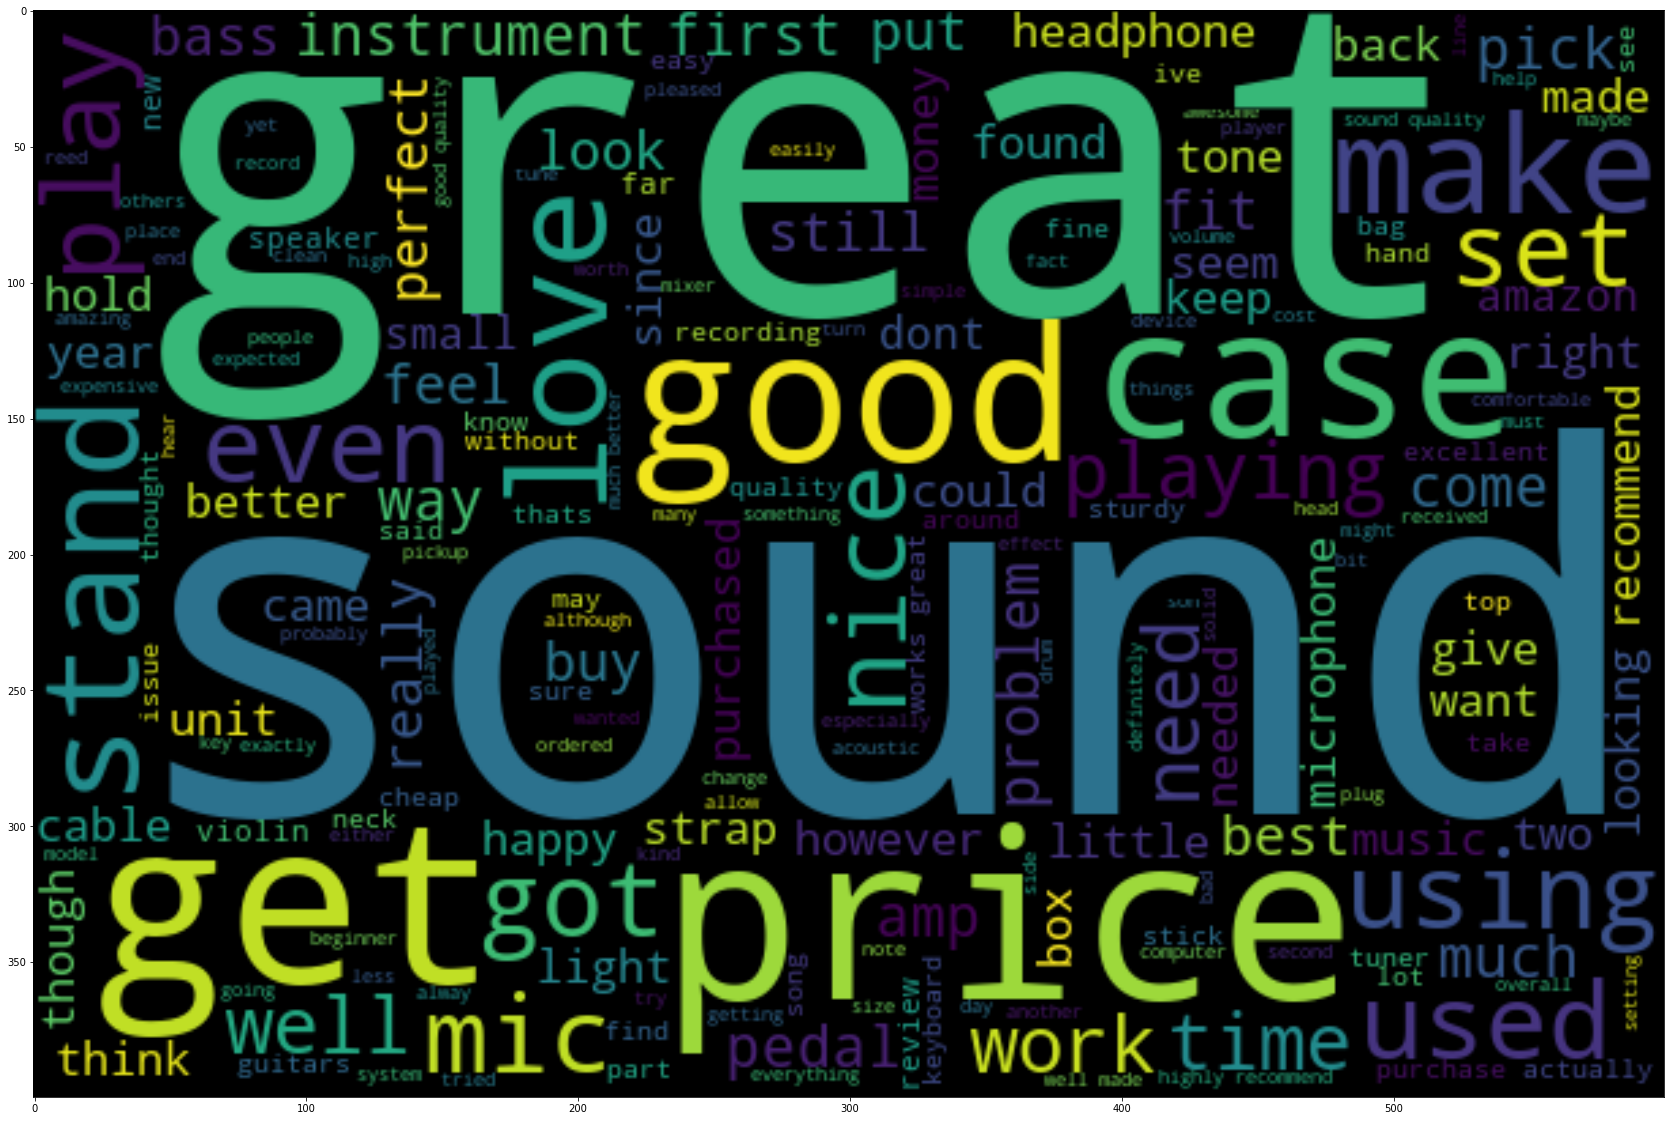

In [ ]:
pos_wc(pos_text)

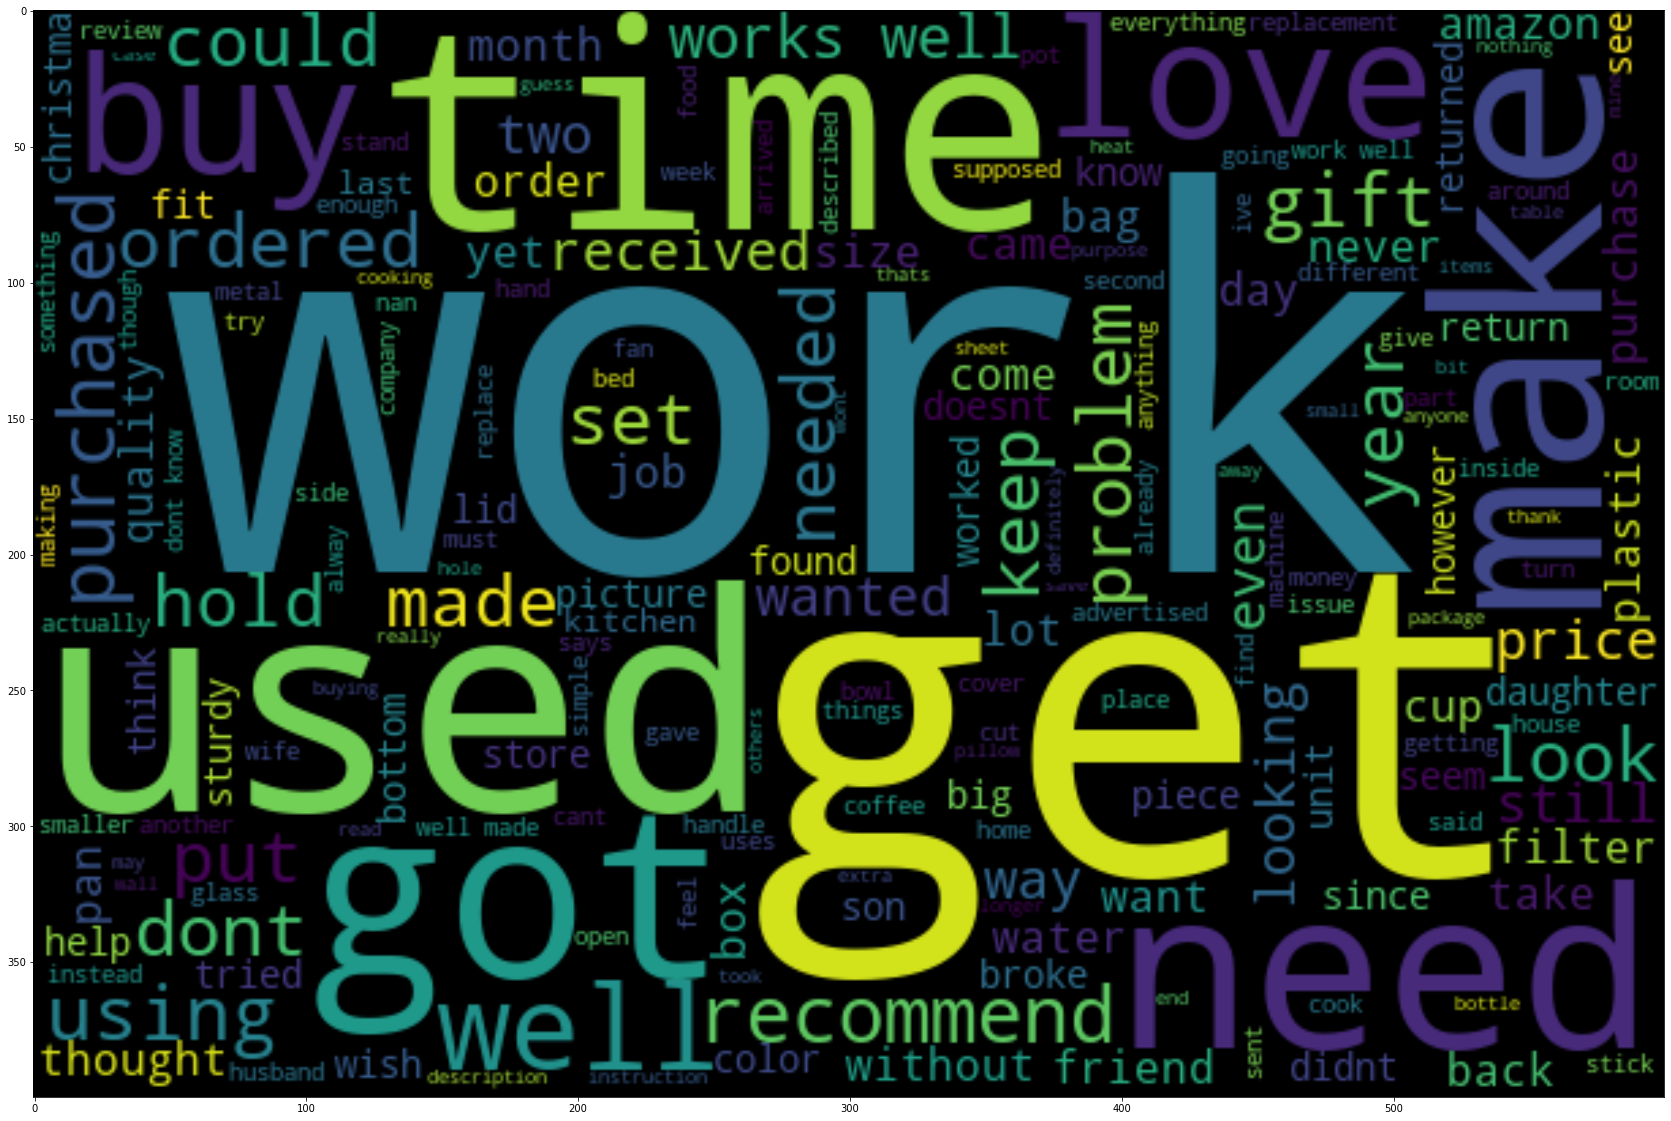

In [ ]:
neutral_wc(neutral_text)

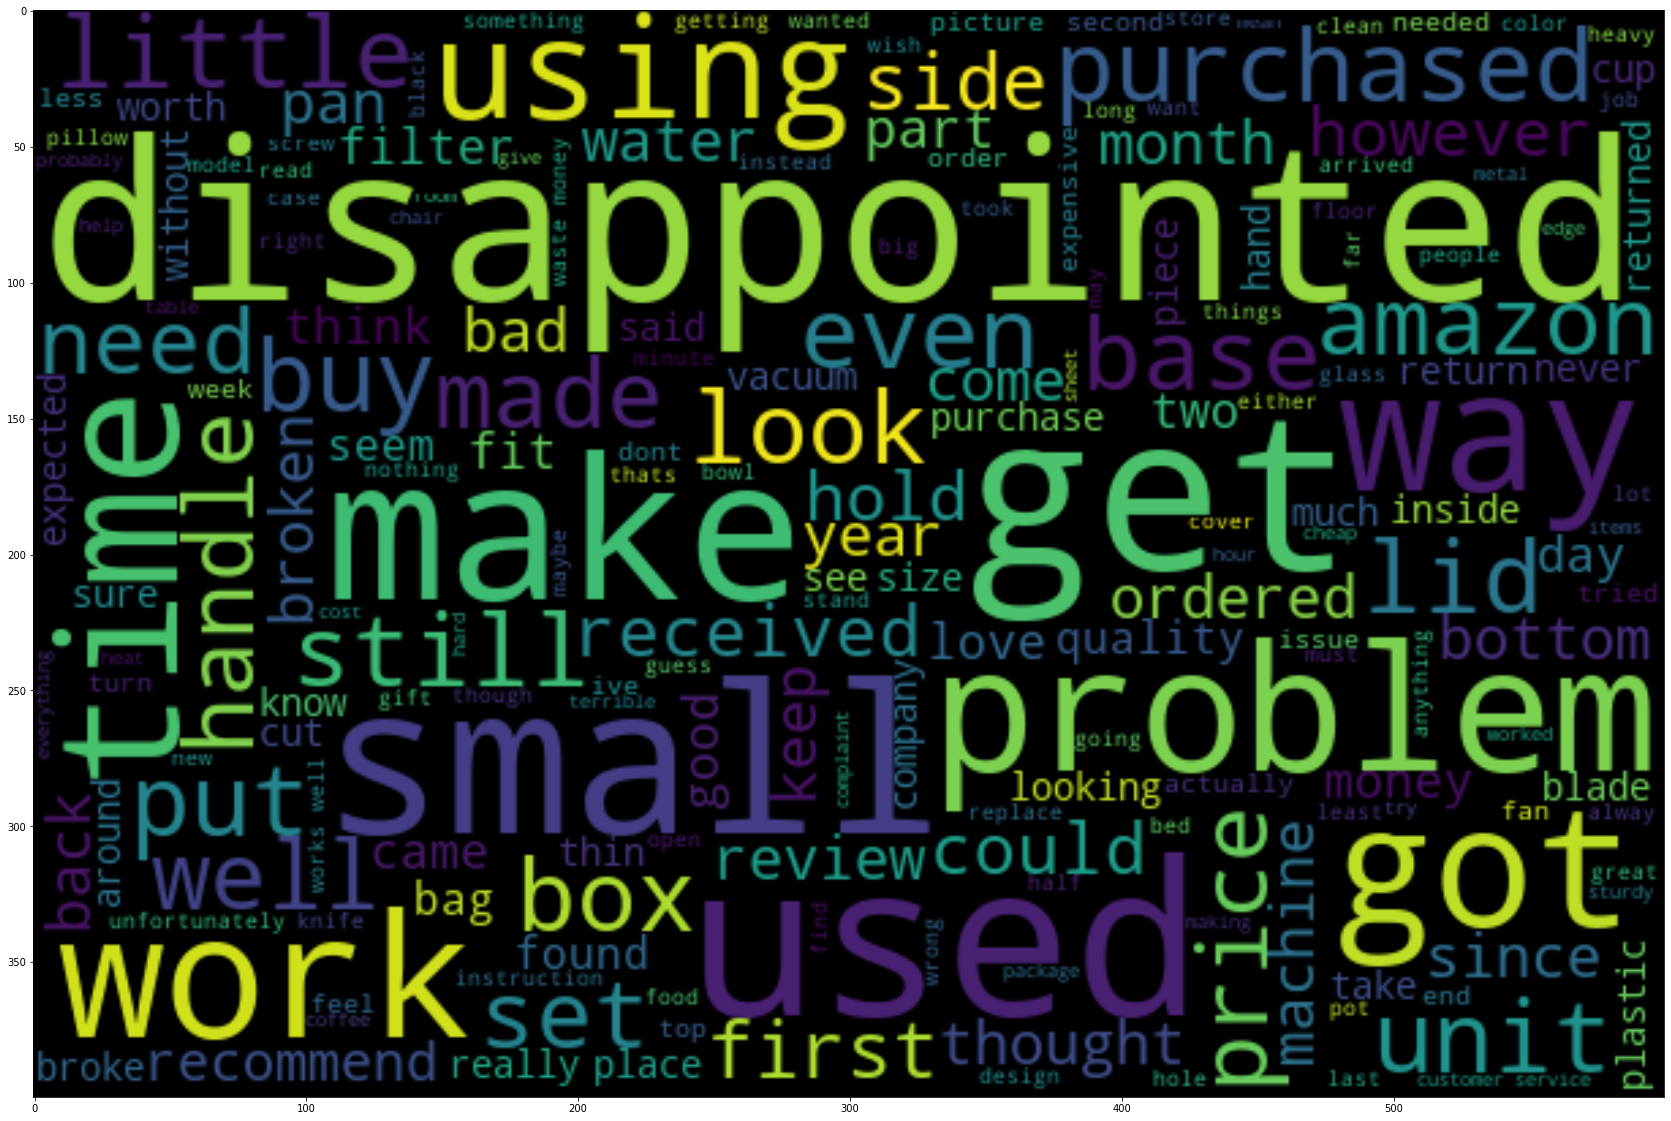

In [ ]:
neg_wc(neg_text)

# TOP FREQUENTLY OCCURING WORDS

In [ ]:
review_pos = df[df['sentiment'] == 'Positive'][:20000]['review']

In [ ]:
review_neu = df[df['sentiment'] == 'Neutral']['review']

In [ ]:
review_neg = df[df['sentiment'] == 'Negative']['review']

In [ ]:
review_pos.dropna(inplace=True)

In [ ]:
## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in str(text).lower().split(" ") if token != "" if token not in stopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]


## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [ ]:
## Get the bar chart from positive reviews
freq_dict = defaultdict(int)
for sent in review_pos:
  for word in generate_ngrams(sent,2):
    freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in review_neg:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]

trace2 = horizontal_bar_chart(fd_sorted.head(25), 'brown')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,horizontal_spacing=0.25,
                          subplot_titles=["Bigram plots of Positive reviews", 
                                          "Bigram plots of Neutral reviews",
                                          "Bigram plots of Negative reviews"
                                          ])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)


fig['layout'].update(height=1000, width=800, paper_bgcolor='rgb(233,233,233)', title="Bigram Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.8/dist-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



The above three bar charts denote the most commonly used 2-word phrases for each sentiment.